In [2]:
import cirq
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

i = cirq.NamedQubit('i')
j = cirq.NamedQubit('j')
k = cirq.NamedQubit('k')
a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')
c = cirq.NamedQubit('c')
d = cirq.NamedQubit('d')
e = cirq.NamedQubit('e')
M = cirq.NamedQubit('M')

In [ ]:
def on_state(i, j, k): # |000>
    circuit_on = cirq.Circuit(cirq.R(i), cirq.CNOT(i, j), cirq.CNOT(i, k), cirq.measure(i,j,k)) # |0>,|0>,|0>
    sim = cirq.Simulator()
    result = sim.run(circuit_on, repetitions=1)
    measurement = "".join((map(str,result.measurements.values())))
    vector_ijk = ''.join(measurement.split())[2:5]
    print("on_state:\nCircuit"), print(circuit_on)
    print("Result:"), print(result)
    print("Measurement vector_ijk:", vector_ijk)
    return(vector_ijk)
on_state(i, j, k)

def off_state(i, j, k): # |111>
    circuit_off = cirq.Circuit(cirq.R(i), cirq.X(i), cirq.CNOT(i, j), cirq.CNOT(i, k), cirq.measure(i, j, k))
    sim = cirq.Simulator()
    result = sim.run(circuit_off, repetitions=1)
    measurement = "".join((map(str,result.measurements.values())))
    vector_ijk = ''.join(measurement.split())[2:5]
    print("off_state:\nCircuit"), print(circuit_off)
    print("Result:"), print(result)
    print("Measurement vector_ijk:", vector_ijk)
    return(vector_ijk)
off_state(i,j,k)

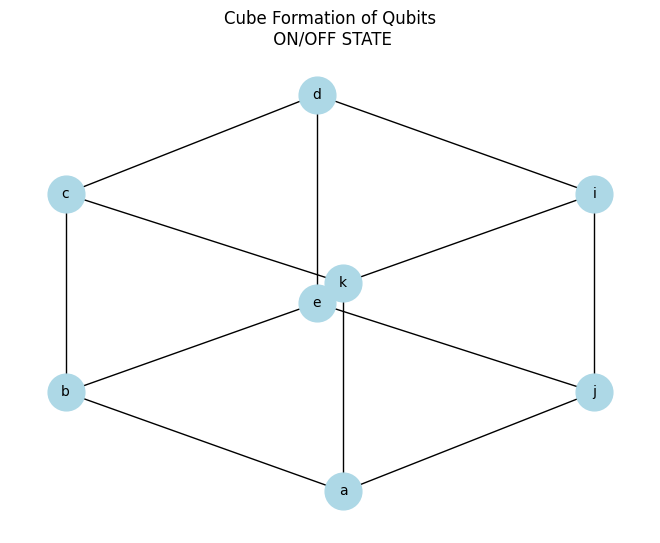

In [12]:
def create_hexagon_structure():
    G1 = nx.Graph()
    nodes_coords = { 
        #M: (0, 0), 
        i: (1, 0.5),
        j: (1, -0.5), 
        k: (0.05, 0.05),
        a: (0.05, -1),
        b: (-1, -0.5),
        c: (-1, 0.5), 
        d: (-0.05, 1),
        e: (-0.05, -0.05) } 

    edges = [ 
        (i, j), (i, k), (i, d),
        (j, a), (k, a),
        (a, b), (b, c), (c, d), (d, e),
        (e, j), (e, k), (b, e), (c, k)
        #(M,i), (M,j), (M,k), (M,a), (M,b), (M,c), (M,d), (M,e)
    ]
    G1.add_nodes_from(nodes_coords.keys())
    G1.add_edges_from(edges)
    nx.draw(G1, pos=nodes_coords, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black')
    plt.title("Cube Formation of Qubits\n ON/OFF STATE")

create_hexagon_structure()

In [ ]:
circuit_init = cirq.Circuit(cirq.CNOT(i, j), cirq.CNOT( i,k), cirq.CNOT(i, a),
                              cirq.CNOT(i, b), cirq.CNOT(i, c), cirq.CNOT(i, d), cirq.CNOT(i, e))
circuit_ON = circuit_init + cirq.Circuit(cirq.)
# Create notebooks for other functions related to plots. Include visualization and quantum circuit generation for each.